I used this log file ==> https://www.kaggle.com/datasets/eliasdabbas/web-server-access-logs

In [1]:
import psycopg2
import re
from datetime import datetime
import pandas as pd
from tqdm import tqdm

In [2]:
start = datetime.now()
with open(r'..\..\Datasets\access.log', 'r') as file:
    data = file.readlines()

df_log = pd.DataFrame(data, columns=['Value'])

print("time length : ", datetime.now() - start)

df_log.head(5)

time length :  0:00:14.751321


,Value
0,54.36.149.41 - - [22/Jan/2019:03:56:14 +0330] ...
1,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""..."
2,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""..."
3,40.77.167.129 - - [22/Jan/2019:03:56:17 +0330]...
4,"91.99.72.15 - - [22/Jan/2019:03:56:17 +0330] ""..."


In [3]:
df_log = df_log.sample(1000000).reset_index(drop=True)

In [4]:
pattern = r'^(\S+) - - \[(.*?)\] "(\S+ \S+ \S+)" (\d+) (\d+) "(.*?)" "(.*?)"'
start = datetime.now()

data_list = []

for i in tqdm(range(len(df_log)), desc ="Data Frame is Creating ... "):
    match = re.match(pattern, df_log.Value[i])
    if match:
        # Create new columns in the DataFrame
        
        timestamp = str(datetime.strptime(match.group(2), "%d/%b/%Y:%H:%M:%S %z"))
        new_row = {'ip_address' : match.group(1), 
                   'date' : timestamp[:10], 
                   'time' : timestamp[11:19], 
                   'request' : match.group(3), 
                   'status_code' : int(match.group(4)), 
                   'response_size' : int(match.group(5)), 
                   'referrer' : match.group(6), 
                   'user_agent' : match.group(7)}
        data_list.append(new_row)
                                
df_log = pd.DataFrame(data_list)
        
print("time length : ", datetime.now() - start)

Data Frame is Creating ... : 100%|█████████████████████████| 1000000/1000000 [00:34<00:00, 28605.73it/s]


time length :  0:00:36.345177


In [ ]:
# df_log.drop("Value", axis=1, inplace=True)

In [5]:
df_log.to_csv('Log_File.csv', index=False)

In [2]:
df_log = pd.read_csv('Log_File.csv')

In [63]:
column = df_log.columns
print(column)
print(" ============================================================================== ")
print()
for col in column:
    print(f"Values for column {col} are :")
    print(f"Minimum Values is : {df_log[col].min()} and Maximum is {df_log[col].max()} ")
    print(df_log[col].unique())
    print("************************************************************")

Index(['ip_address', 'date', 'time', 'request', 'status_code', 'response_size',
       'referrer', 'user_agent'],
      dtype='object')

Values for column ip_address are :
Minimum Values is : 1.158.74.178 and Maximum is 99.253.184.236 
['5.160.50.46' '2.180.175.109' '5.127.19.138' ... '109.125.173.165'
 '5.120.213.142' '195.181.19.0']
************************************************************
Values for column date are :
Minimum Values is : 2019-01-22 and Maximum is 2019-01-26 
['2019-01-23' '2019-01-22' '2019-01-24' '2019-01-26' '2019-01-25']
************************************************************
Values for column time are :
Minimum Values is : 00:00:00 and Maximum is 23:59:59 
['12:01:41' '12:49:37' '23:17:25' ... '01:44:45' '06:27:39' '07:13:25']
************************************************************
Values for column request are :
Minimum Values is : CONNECT www.msftncsi.com:443 HTTP/1.1 and Maximum is PROPFIND / HTTP/1.1 
['GET /image/55327/productModel/150x150 HTTP/

TypeError: '<=' not supported between instances of 'str' and 'float'

In [79]:
# gb_ip_address = df_log.groupby('ip_address')
# gb_ip_address = pd.DataFrame({'ip_address' : gb_ip_address.size().index ,'count' : gb_ip_address.size().values})
# len(gb_ip_address)

In [54]:
def plot(df, col, min_threshold, max_threshold):
    df_temp = df[df[col].isin(df[col].value_counts()[
                            (df[col].value_counts() > min_threshold) & 
                            (df[col].value_counts() < max_threshold)].index)]
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df_temp)

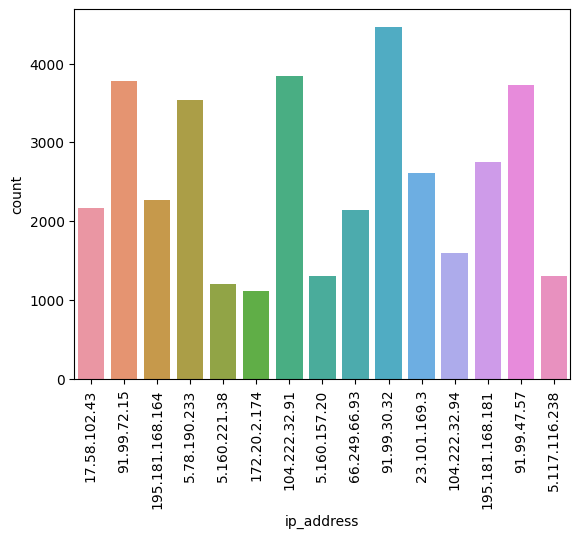

In [59]:
plot(df_log, "ip_address", min_threshold=1000, max_threshold=5000)

In [76]:
def plot2(df, col):
    temp_count = df[col].value_counts().sort_index()
    print(f"from {temp_count.index[0]} to {temp_count.index[-1]}")
    sns.lineplot(x=temp_count.index, y=temp_count.values)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Value Counts of {col}')

from 2019-01-22 to 2019-01-26


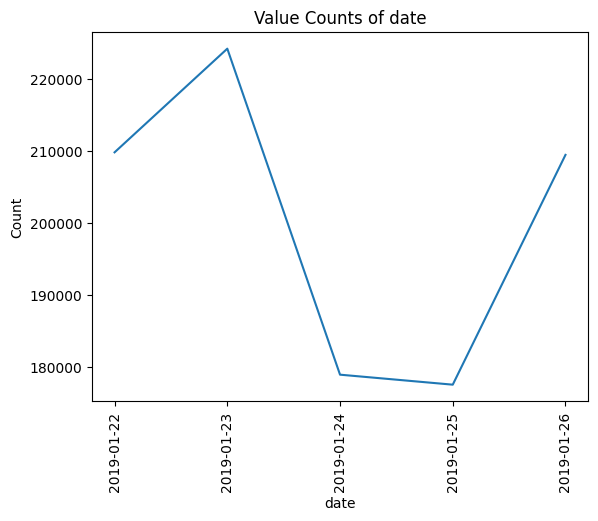

In [77]:
plot2(df_log, 'date')

from 00:00:00 to 23:59:59


Text(0.5, 1.0, 'Value Counts of time')

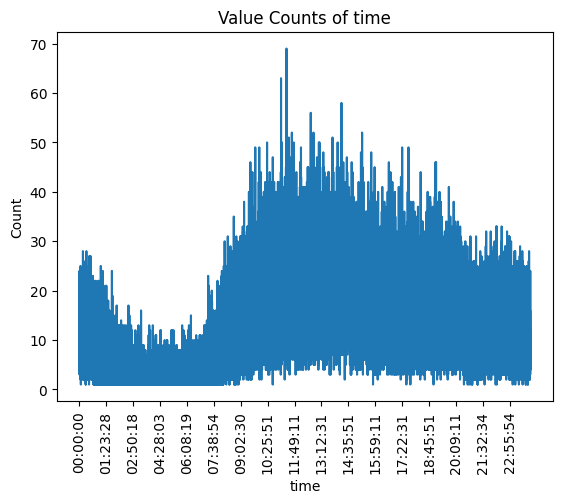

In [73]:
time_counts = df_log['time'].value_counts().sort_index()
print(f"from {time_counts.index[0]} to {time_counts.index[-1]}")
sns.lineplot(x=time_counts.index, y=time_counts.values)
# Set the tick frequency, Show every 24th tick label
n = 5000
# Get the current tick labels
ticks = plt.xticks()[0]
# Set only every nth tick label
plt.xticks(ticks[::n])
plt.xticks(rotation=90)
plt.xlabel('time')
plt.ylabel('Count')
plt.title('Value Counts of time')

from 200 to 504


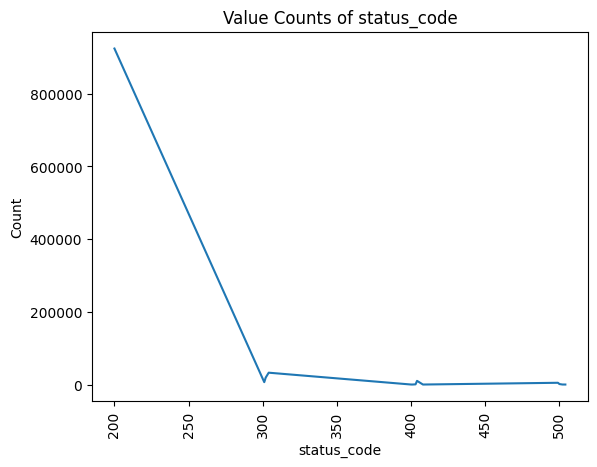

In [80]:
# 'response_size','user_agent'
plot2(df_log, 'status_code')

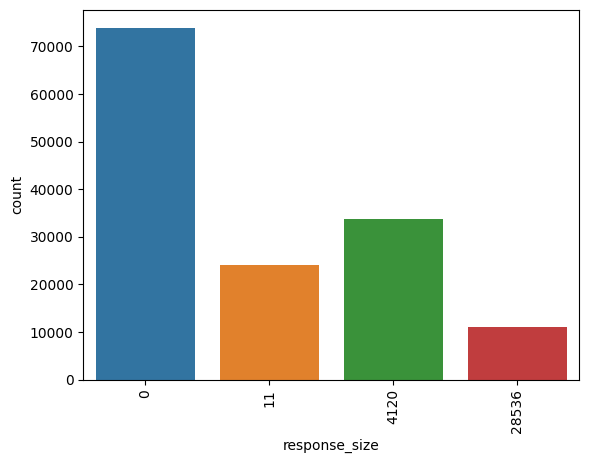

In [85]:
# plot2(df_log, 'response_size')
plot(df_log, 'response_size', min_threshold=10000, max_threshold=80000)

In [ ]:
def check_exist_DataBase(db_name):
    conn = psycopg2.connect(
        user="postgres",
        password="YOUR postgreSQL PASSWORD",
        host="localhost",
        port="5432",
        database="postgres"    )
    
#     Disable autocommit mode which disables the transaction block. 
#     This allows us to execute the CREATE DATABASE statement successfully.
    conn.autocommit = True

    cursor = conn.cursor()
    # Define the name of the database you want to check
    database_name = db_name
    # Check if the database already exists
    cursor.execute("SELECT 1 FROM pg_catalog.pg_database WHERE datname = %s", (database_name,))
    database_exists = cursor.fetchone()

    # If the database does not exist, create it
    if not database_exists:
        cursor.execute(f"CREATE DATABASE {database_name}")
        conn.close()
        
        conn = psycopg2.connect(
            user="postgres",
            password="YOUR postgreSQL PASSWORD",
            host="localhost",
            port="5432",
            database=database_name )

        cursor = conn.cursor()

        # Create a table within the database
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS logs (
                ip_address VARCHAR(16),
                timestamp VARCHAR(19),
                request TEXT,
                status_code INT,
                response_size INT,
                referrer TEXT,
                user_agent TEXT )    """)

        print(f"The database '{database_name}' and Table Logs has been created.")
    else:
        print(f"The database '{database_name}' already exists.")

    # Commit the changes and close the connection
    conn.commit()
    cursor.close()
    conn.close()

In [ ]:
def extract_data(log_line):
    # Define regular expressions to extract relevant information
    pattern = r'^(\S+) - - \[(.*?)\] "(\S+ \S+ \S+)" (\d+) (\d+) "(.*?)" "(.*?)"'
    match = re.match(pattern, log_line)
    
    if match:
        # Extract individual fields from the log line
        ip_address = match.group(1)
        timestamp = datetime.strptime(match.group(2), "%d/%b/%Y:%H:%M:%S %z")
        request = match.group(3)
        status_code = int(match.group(4))
        response_size = int(match.group(5))
        referrer = match.group(6)
        user_agent = match.group(7)
        
        # Return the extracted data as a dictionary
        return {
            "ip_address": ip_address,
            "timestamp": timestamp,
            "request": request,
            "status_code": status_code,
            "response_size": response_size,
            "referrer": referrer,
            "user_agent": user_agent
        }
    else:
        return None

def transform_data(data): 
    # Perform any necessary transformations on the extracted data
    # In this example, we can convert the timestamp to a string format
    data["timestamp"] = data["timestamp"].strftime("%Y-%m-%d %H:%M:%S")
    
    return data

def load_data(n, data):
    # Implement the data loading process
    # In this example, we'll simply Insert the transformed data to the DataBase
    insert(n, data["ip_address"], data["timestamp"], data["request"], data["status_code"], data["response_size"], data["referrer"], data["user_agent"])    

In [ ]:
def insert(n, ip_address, timestamp, request, status_code, response_size, referrer, user_agent):
    try:
        connection = psycopg2.connect(
            user="postgres",
            password="YOUR postgreSQL PASSWORD",
            host="localhost",
            port="5432",
            database="web_server_log"
        )

        cursor = connection.cursor()
        pg_insert = """INSERT INTO public."logs" 
            ("ip_address", "timestamp", "request", "status_code", "response_size", "referrer", "user_agent")
            VALUES (%s, %s, %s, %s, %s, %s, %s)"""
        
        Inserted_Values = (ip_address, timestamp, request, status_code, response_size, referrer, user_agent )
            

        cursor.execute(pg_insert, Inserted_Values)
        connection.commit()

        print(n, "th Record Successfully inserted ")

        except(Exception, psycopg2.Error) as error:
        print("Error connecting to PosgreSQL database", error)
        connection = None

    finally:
        if(connection):
            cursor.close()
            connection.close()

In [ ]:
check_exist_DataBase("web_server_log")
n = 1

start = datetime.now()
with open(r'Datasets\access.log', 'r') as file:
    for line in file:

        # Extract data from the log line
        extracted_data = extract_data(line)

        # Transform the extracted data
        transformed_data = transform_data(extracted_data)

        # Load the transformed data
        load_data(n, transformed_data)
        n += 1

print("time length : ", datetime.now() - start)